# Analysis of UBER Data With PYTHON
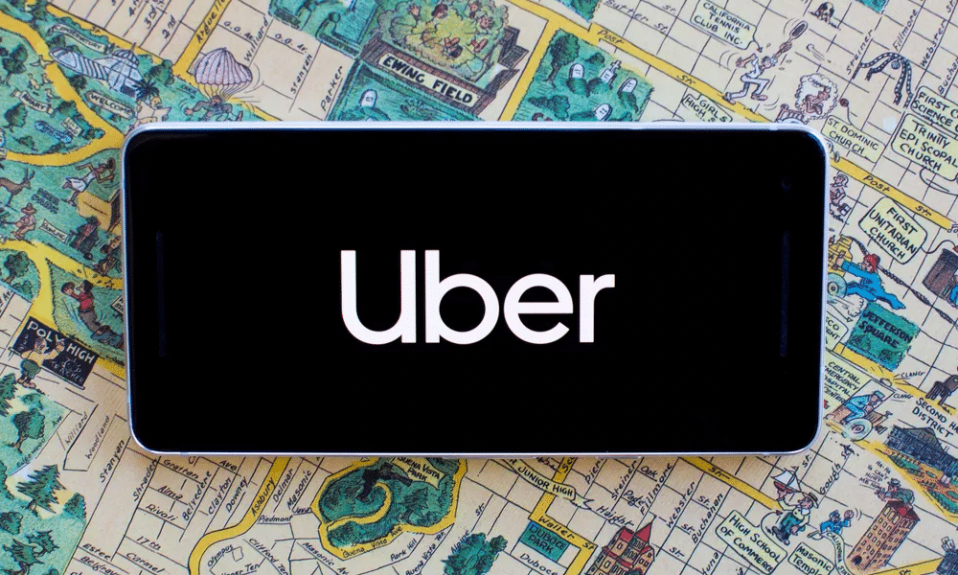

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import datetime
import calendar

In [2]:
uber=pd.read_csv("C:\\Users\\Pranav\\Downloads\\Uber Drives - .csv")
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# shape of dataset
uber.shape

(1156, 7)

In [4]:
# information about dataset
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#Describe of dataset
uber.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
# find ot null value in dataset
uber.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
# index of dataset
uber.index

RangeIndex(start=0, stop=1156, step=1)

In [8]:
 # Dtypes of dataset
uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [9]:
uber=uber.dropna()

In [10]:
uber.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
uber['START_DATE*']=pd.to_datetime(uber['START_DATE*'],format='%m/%d/%Y %H:%M')
uber['END_DATE*']=pd.to_datetime(uber['END_DATE*'],format='%m/%d/%Y %H:%M')

In [12]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in uber['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
    
uber['HOUR']=hour
uber['DAY']=day
uber['DAY_OF_WEEK']=dayofweek
uber['MONTH']=month
uber['WEEKDAY']=weekday

In [13]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


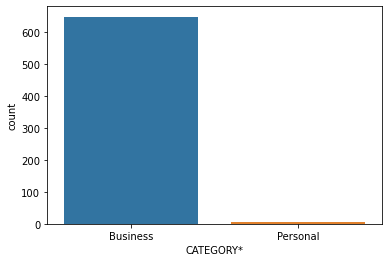

In [14]:
# Countplot of Category
sns.countplot(x='CATEGORY*',data=uber)
plt.show()

### How long do people travel with uber

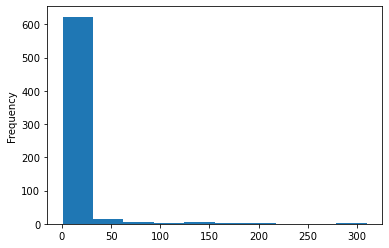

In [15]:
uber['MILES*'].plot.hist()
plt.show()

### What hours do most people take Uber to their Destination

In [16]:
hours= uber['START_DATE*'].dt.hour.value_counts()
hours

13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: START_DATE*, dtype: int64

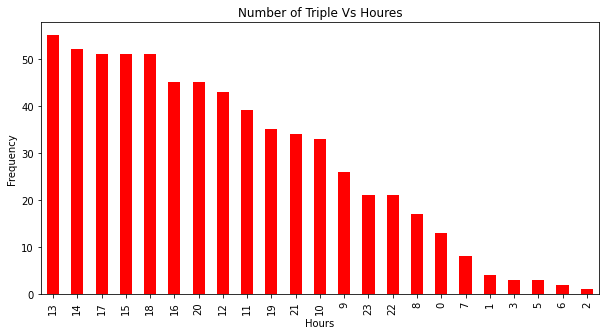

In [17]:
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Triple Vs Houres')
plt.show()

### Check the Purpose of Trips

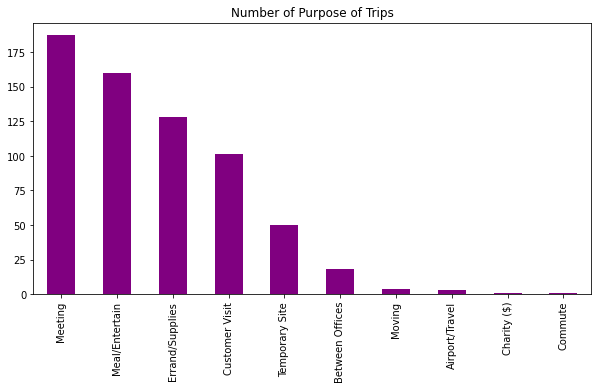

In [18]:
uber['PURPOSE*'].value_counts().plot(kind='bar',color='purple',figsize=(10,5))
plt.title('Number of Purpose of Trips')
plt.show()

### Which day has the heighest number of trips

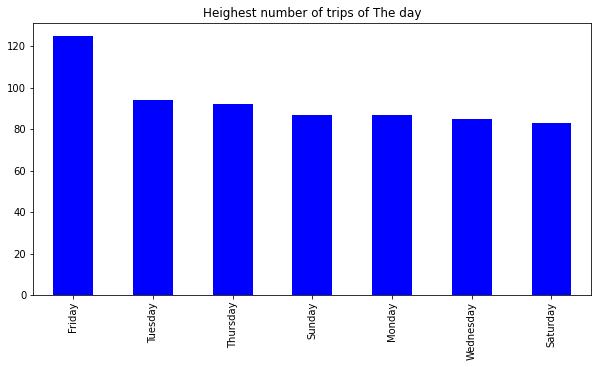

In [19]:
uber['WEEKDAY'].value_counts().plot(kind='bar',color='blue',figsize=(10,5))
plt.title('Heighest number of trips of The day')
plt.show()

### What are the Number of Trips per each day....?


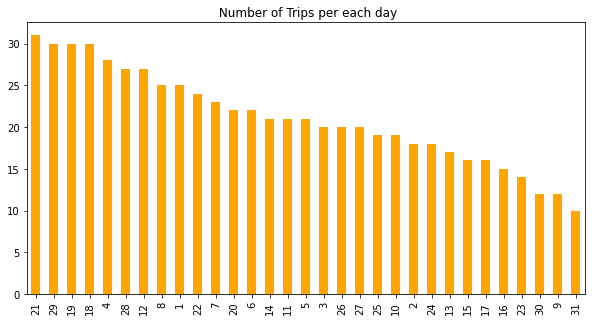

In [20]:
uber['DAY'].value_counts().plot(kind='bar',color='orange',figsize=(10,5))
plt.title(' Number of Trips per each day')
plt.show()

### What are the trips in the month

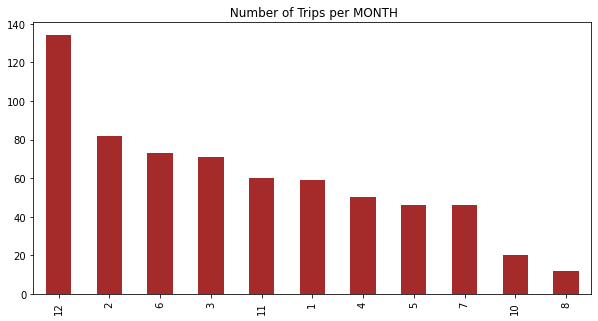

In [21]:
uber['MONTH'].value_counts().plot(kind='bar',color='brown',figsize=(10,5))
plt.title(' Number of Trips per MONTH')
plt.show()

### The starting points of trips.where do people start boarding their trip from most

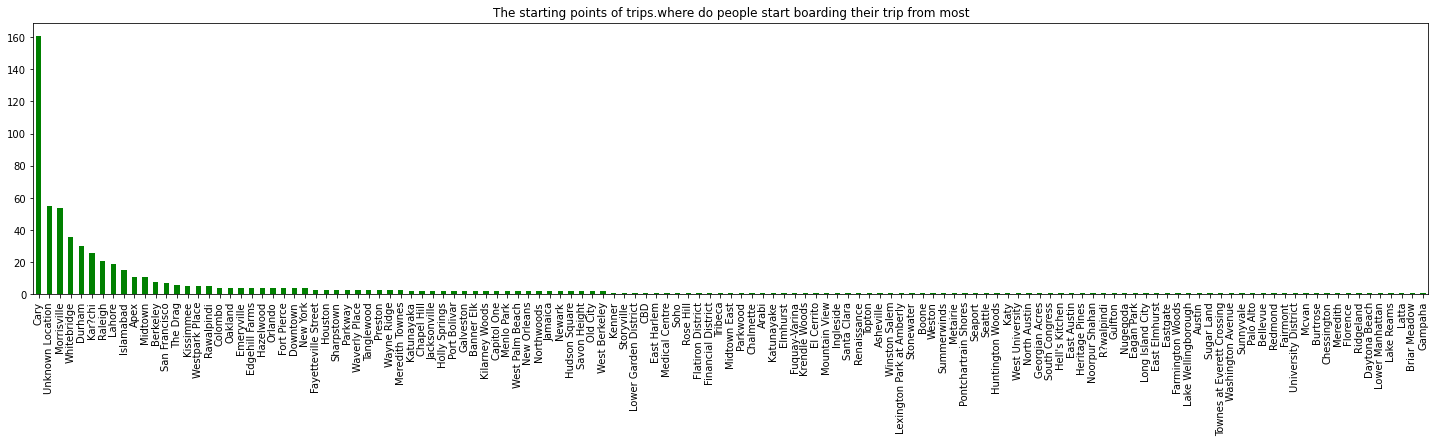

In [22]:
uber['START*'].value_counts().plot(kind='bar',color='green',figsize=(25,5))
plt.title('The starting points of trips.where do people start boarding their trip from most')
plt.show()